<a href="https://colab.research.google.com/github/cepdnaclk/e19-co544-Bitcoin-Transaction-Analysis-for-Ransomware-Identification/blob/main/Bitcoin_Transaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
bitcoin_dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/BitcoinHeistData.csv')


In [ ]:
bitcoin_dataset.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [ ]:
bitcoin_dataset.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


Missing Values:
 address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64


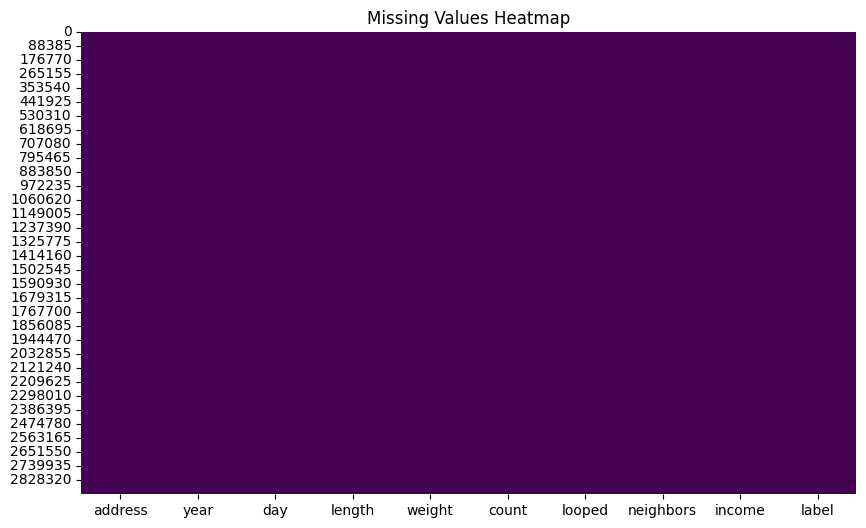

In [ ]:
# Step 1: Summarize Missing Values
missing_values = bitcoin_dataset.isnull().sum()
print("Missing Values:\n", missing_values)

# Step 2: Visualize Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(bitcoin_dataset.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Define a function to convert labels to binary
def convert_to_binary(label):
    if label == 'white':
        return 0  # Assign 0 for 'White' class
    else:
        return 1  # Assign 1 for 'Ransomware' class

# Apply the function to create a new binary label column
bitcoin_dataset['Binary_Label'] = bitcoin_dataset['label'].apply(convert_to_binary)

# Check the updated DataFrame
print(bitcoin_dataset.head())

                              address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44  0.000244      1   
2  112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0  1.000000      1   
3  1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72  0.003906      1   
4  1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144  0.072848    456   

   looped  neighbors       income            label  Binary_Label  
0       0          2  100050000.0  princetonCerber             1  
1       0          1  100000000.0   princetonLocky             1  
2       0          2  200000000.0  princetonCerber             1  
3       0          2   71200000.0  princetonCerber             1  
4       0          1  200000000.0   princetonLocky             1  


In [ ]:
# Data Visualization

# Histograms for numerical features
numerical_features = ['year', 'day', 'length', 'count', 'neighbors', 'weight', 'looped', 'income']
plt.figure( figsize=(12, 8))
# for i, feature in enumerate(numerical_features, 1):
#     plt.subplot(3, 3, i)
#     sns.histplot(bitcoin_dataset[feature], kde=True)
#     plt.title(f'Histogram of {feature}')
# plt.subplot(3,3,1)
# sns.histplot(bitcoin_dataset['length'],kde=True)
# plt.title(f'Histogram of length')

# # plt.subplot(3,3,2)
# sns.histplot(bitcoin_dataset['weight'])
# plt.title(f'Histogram of weights')

# plt.subplot(3,3,3)
sns.histplot(bitcoin_dataset['neighbors'])
plt.title(f'Histogram of neighbours')

plt.savefig('neighbours.png')
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7bffaf0243a0> (for post_execute):


KeyboardInterrupt: 

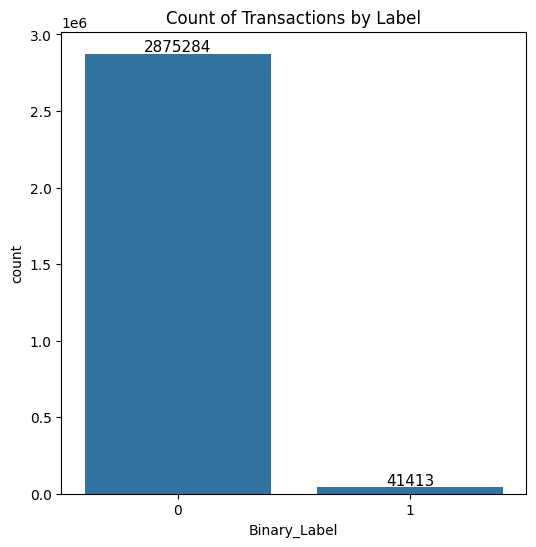

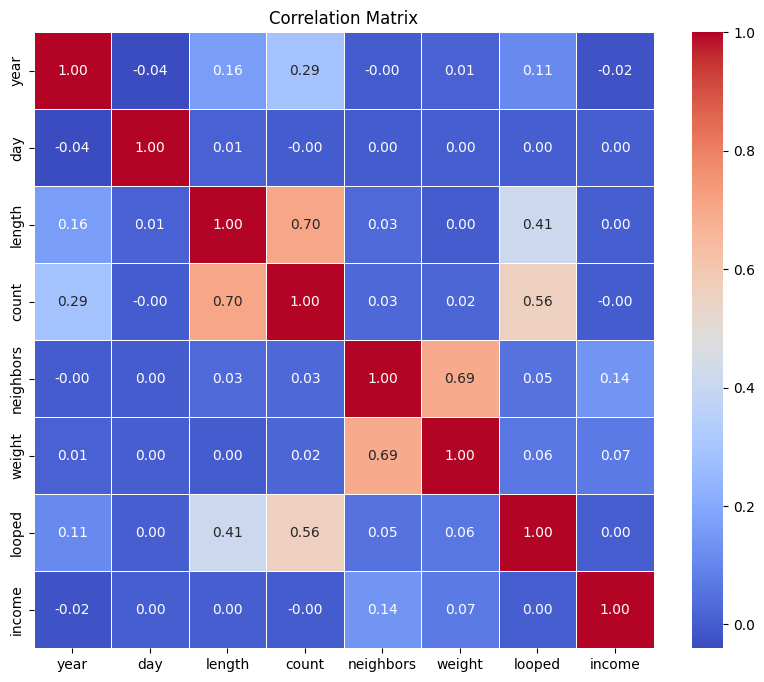

In [15]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Binary_Label', data=bitcoin_dataset)

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Transactions by Label')
plt.savefig('Count_label.png')
plt.show()


numerical_features = ['year', 'day', 'length', 'count', 'neighbors', 'weight', 'looped', 'income']

# # Pairwise scatter plots for numerical features
# sns.pairplot(bitcoin_dataset[numerical_features])
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = bitcoin_dataset[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.savefig('correlation_mat.png')
plt.show()

Outliers for year: 0
Outliers for day: 0
Outliers for length: 0
Outliers for count: 91373
Outliers for neighbors: 3090
Outliers for weight: 5305
Outliers for looped: 73748
Outliers for income: 2844


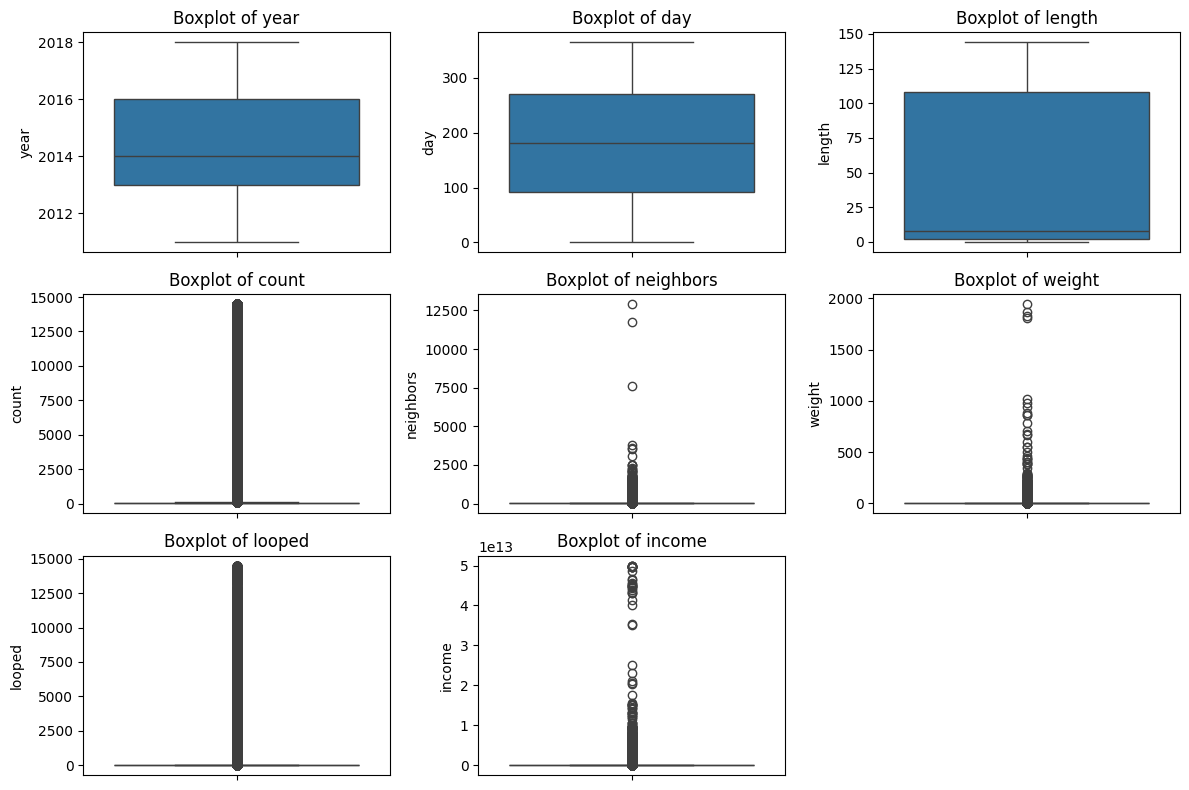

In [ ]:
# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Specify numerical features for outlier detection
numerical_features = ['year', 'day', 'length', 'count', 'neighbors', 'weight', 'looped', 'income']

# Detect outliers for each numerical feature
outliers = {}
for feature in numerical_features:
    outliers[feature] = detect_outliers_zscore(bitcoin_dataset[feature])

# Print summary of outliers for each feature
for feature, outlier_mask in outliers.items():
    print(f"Outliers for {feature}: {outlier_mask.sum()}")

# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=bitcoin_dataset[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()



In [ ]:
bitcoin_dataset['label'].value_counts()

label
white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw        

In [ ]:
white_data = bitcoin_dataset[bitcoin_dataset.label == 'white']
ransom_data = bitcoin_dataset[bitcoin_dataset.label != 'white']

In [ ]:
print(white_data.shape)
print(ransom_data.shape)

(2875284, 10)
(41413, 10)


In [ ]:
white_data.weight.describe()


count    2.875284e+06
mean     5.443391e-01
std      3.686734e+00
min      3.606469e-94
25%      2.111024e-02
50%      2.500000e-01
75%      8.750000e-01
max      1.943749e+03
Name: weight, dtype: float64

In [ ]:
ransom_data.weight.describe()

count    4.141300e+04
mean     6.274532e-01
std      2.667625e+00
min      4.719723e-42
25%      6.250000e-02
50%      3.880441e-01
75%      1.000000e+00
max      4.982885e+02
Name: weight, dtype: float64